In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

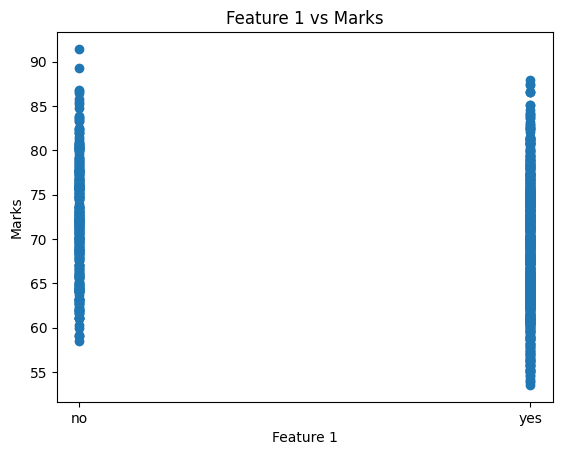

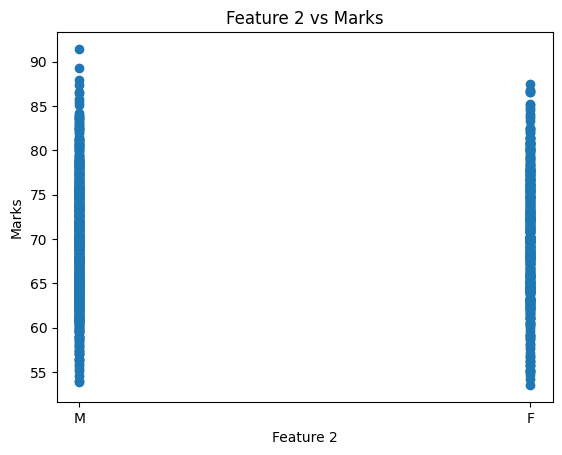

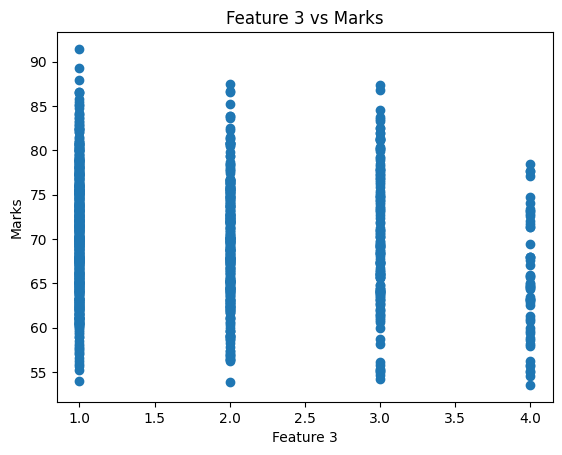

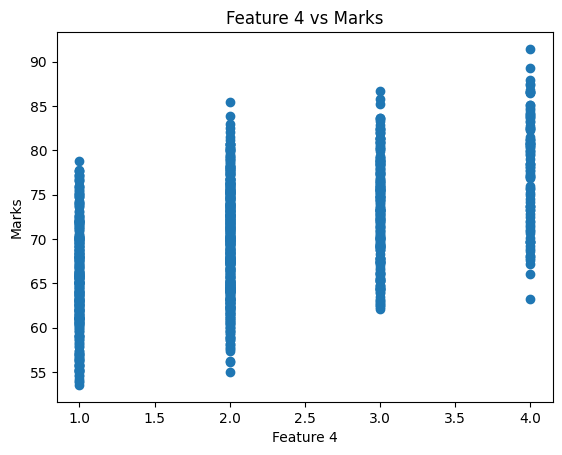

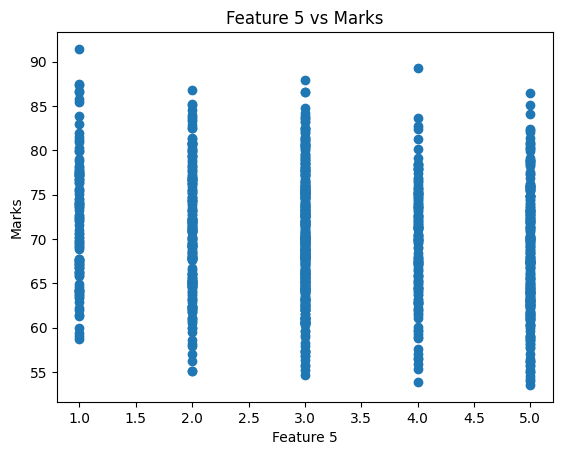

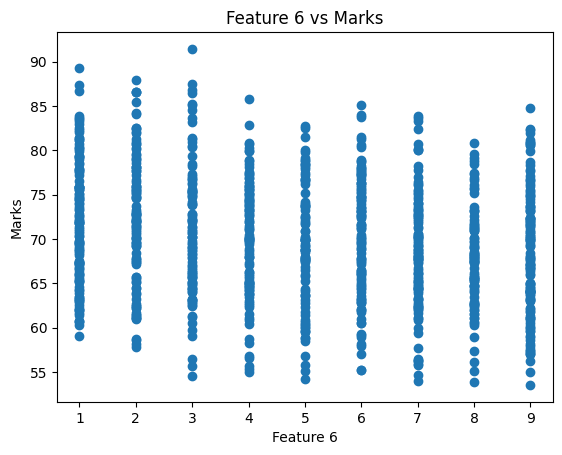

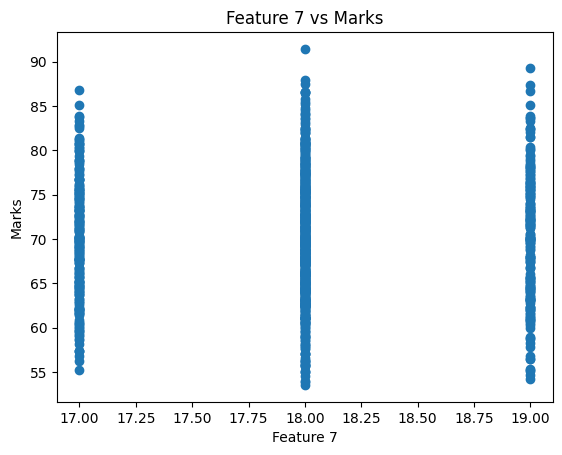

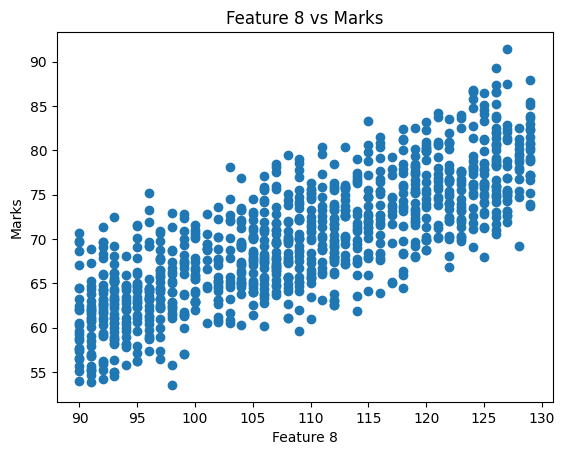

In [5]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM
for i in range(x_train.shape[1]):
    plt.figure()
    plt.scatter(x_train[:, i], y_train)
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Marks')
    plt.title(f'Feature {i+1} vs Marks')
    plt.show()
def feature_changing(x_train):
  for i in range(x_train.shape[1]):
        if isinstance(x_train[0, i], str):
            le = LabelEncoder()
            x_train[:, i] = le.fit_transform(x_train[:, i])
  poly_feature = x_train[:, 0].reshape(-1, 1) ** 2
  x_train = np.hstack((x_train, poly_feature))
  # ---------
    # Your code here
  # ---------
  return x_train

x_train = feature_changing(x_train)

In [6]:

def z_score(x_train):

    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean) / x_std

    return x_train,x_std,x_mean

In [7]:
def cost(x_train,y_train,w,b):

    m = x_train.shape[0]
    predictions = x_train.dot(w) + b


    errors = predictions - y_train
    squared_errors = errors ** 2


    loss = np.mean(squared_errors)

    return loss

In [21]:
def gradient_descent(x_train, y_train, w, b, learning_rate=0.01, num_iterations=1000):
    m = x_train.shape[0]  # Number of training examples

    for i in range(num_iterations):
        # Calculate predictions
        predictions = x_train.dot(w) + b

        # Compute the gradients
        error = predictions - y_train
        dw = (1 / m) * x_train.T.dot(error)
        db = (1 / m) * np.sum(error)

        # Update the weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b


In [22]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
